# **Problem set 4** - Machine Learning for Physics and Astronomy 2023/2024, UvA

- The total sheet gives 27 points
- Deadline for submitting your results is **Wed, 8/5/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

In [78]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Chapter 7: Basic Deep learning - The Multi Layer Perceptron （14 points）

### 7.1 Pytorch Basics (4 points)

In this exercise, we will be exploring some basic aspects of `pytorch`, its `autograd` functionality, and connecting the neural network theory to code.

Consider the folloiwng simple linear model. This is equivalent to the Logistic Regression model from last week, with 5 inputs and 1 output. We now take a look at a print out of its internal parameters. Now is a good time to (re-)familiarize yourself with the [PyTorch documentation](https://pytorch.org/docs/stable/index.html). Before asking questions, make sure you seek solutions by searching the official documentation link provided above (or try using other tools like large language models and popular search engines).

In [79]:
# define a machine learning "model", here a simple linear layer
model = torch.nn.Linear(5, 1)

# iterate over all parameters in the model
for par in model.parameters():
    # print parameter (pytorch can print out the parameters nicely for us)
    print(par)

    # print shape and gradient
    print('shape:', par.shape, 'gradient:', par.grad)
    print('----')

Parameter containing:
tensor([[ 0.2741, -0.0166, -0.2049,  0.3994, -0.1119]], requires_grad=True)
shape: torch.Size([1, 5]) gradient: None
----
Parameter containing:
tensor([-0.0199], requires_grad=True)
shape: torch.Size([1]) gradient: None
----


1. (1 point) What is the mathematical definition of this model? How do the printed parameters of the model relate to the mathematical defintion, i.e. what does each parameter represent?  What is `par.grad` showing, and why is it `None`?  Why does it make sense that `requires_grad` is initialized to `True`?

The mathematical definition of the model torch.nn.Linear is $y = xA^T+b$
<br>
The first parameter printed is the weight matrix with dimensions (1,5) consisting of the 5 input features and 1 output. The second is the bias vector with dimension (1,).
<br>
Par.grad shows the sum of gradients of outputs with respect to the inputs. It is None right now as we have not done any gradient computation.
<br>
It makes sense to have requires_grad set to true as for training a neural network we need to compute gradients for optimizing parameters. Setting this to true ensures that gradients are computed in the backward pass.

Now let us provide an input tensor $x$ for our model and compute the gradients with respect to our parameters. This is done via the `.backward()` call.

In [80]:
x = torch.tensor([1., 2., 3., 4., 5.])
model = torch.nn.Linear(5, 1)
y = model(x)
y.backward()
for par in model.parameters():
    print(par, par.shape, par.grad)

Parameter containing:
tensor([[-0.2897,  0.1812,  0.1806,  0.2949,  0.0678]], requires_grad=True) torch.Size([1, 5]) tensor([[1., 2., 3., 4., 5.]])
Parameter containing:
tensor([0.0702], requires_grad=True) torch.Size([1]) tensor([1.])


2. (1 point) Analytically, what are the gradients that the above code calculates? This should stem from your model definition. Note that `par.grad` is no longer None. What information does `par.grad` contain?

The gradient of the loss with respect to the weight matrix will be a tensor of shape (1, 5) containing the partial derivatives of the loss with respect to each element of the weight matrix. The gradient of the loss with respect to the bias vector b will be a tensor of shape (1,) containing the partial derivative of the loss with respect to b.
<br>
par.grad contains the gradients for each parameter which can be used to update it during optimization.

3. (1 point) Let's now switch to an ever so slightly more complex model: a multi-layer perceptron (MLP) with two hidden layers (with 10 and 4 hidden neurons). What is the mathemtatical defintion of the following model, which is defined using `nn.Sequential`?  Inspect its internal parameters. How are the internal parameters of the model related to the mathematical defintion you wrote down?

In [81]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), torch.nn.ReLU(),
    torch.nn.Linear(10, 4), torch.nn.ReLU(),
    torch.nn.Linear(4, 1), torch.nn.Sigmoid(),
)

In [82]:
# YOUR CODE HERE
#Inspecting model
print(model)

for name, param in model.named_parameters():
    print(name, param.shape)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)
0.weight torch.Size([10, 2])
0.bias torch.Size([10])
2.weight torch.Size([4, 10])
2.bias torch.Size([4])
4.weight torch.Size([1, 4])
4.bias torch.Size([1])


This sequential model has the following mathematical definition:
<br>
1. Input layer- 2 neurons
2. Hidden Layer 1: The first hidden layer consists of 10 neurons. It applies a linear transformation followed by a ReLU activation function.
3. Hidden Layer 2: The second hidden layer consists of 4 neurons. It applies another linear transformation followed by a ReLU activation function.
4. Output Layer: The output layer consists of 1 neuron. It applies a final linear transformation followed by a sigmoid activation function.

The first linear layer (torch.nn.Linear(2, 10)) has parameters for the weight matrix and the bias vector, which correspond to the transformation from the input layer (2 neurons) to the first hidden layer (10 neurons).
The second linear layer (torch.nn.Linear(10, 4)) has parameters for the weight matrix and the bias vector, which correspond to the transformation from the first hidden layer (10 neurons) to the second hidden layer (4 neurons).
The third linear layer (torch.nn.Linear(4, 1)) has parameters for the weight matrix and the bias vector, which correspond to the transformation from the second hidden layer (4 neurons) to the output layer (1 neuron).
The ReLU activation functions don't have any parameters to optimize. They simply perform element-wise operations on the input tensor.
The sigmoid activation function also doesn't have any parameters to optimize.
So, the internal parameters of the model, which are optimized during training, directly relate to the weights and biases of the linear transformations between layers in the mathematical definition of the MLP.

4. (0.5 point) Run different random tensors generated with `torch.randn(...)` through the previous model. Start with tensors of the shape (2,), (1,2),(9, 2), (2, 4, 2). How are input shapes connected to output shapes? What is the role of the last dimension and what constraints do we have there?

*Hint: Consider the case of training a neural network, i.e. passing the neural network many individual examples. In that case, what do the first dimension(s) represent?*

In [83]:
# YOUR SOLUTION
input_shapes = [(2,), (1, 2), (9, 2), (2, 4, 2)]

# Run each input tensor through the model and print output shapes
for input_shape in input_shapes:
    x = torch.randn(*input_shape)
    y = model(x)
    print("For input shape:", input_shape, ", output shape is:", y.shape)

For input shape: (2,) , output shape is: torch.Size([1])
For input shape: (1, 2) , output shape is: torch.Size([1, 1])
For input shape: (9, 2) , output shape is: torch.Size([9, 1])
For input shape: (2, 4, 2) , output shape is: torch.Size([2, 4, 1])


Input shapes are connected to output as explained below:
<br>
1. For an input tensor of shape (2,), the output shape will be (1,). This is because the model expects a single data point with 2 features and produces a single output prediction.
2. For an input tensor of shape (1, 2), the output shape will still be (1,). This is because the first dimension of size 1 represents a single data point, and the model still produces a single output prediction for that data point.
3. For an input tensor of shape (9, 2), the output shape will be (9, 1). This is because the model processes 9 data points simultaneously (batch size of 9), and for each data point, it produces a single output prediction.
4. For an input tensor of shape (2, 4, 2), the output shape will be (2, 4, 1). This is because the model processes 2 batches of data, each containing 4 data points (samples), and for each sample, it produces a single output prediction.
<br>
The last dimension of the output shape (the number 1) corresponds to the model's prediction for each input. In a binary classification setting (as indicated by the Sigmoid activation function in the last layer), this represents the probability of belonging to one of the classes. The constraints on this dimension depend on the problem being solved. For binary classification tasks, the output should be constrained between 0 and 1, representing probabilities.

5. (0.5 points) Give one additional shape that would lead to an error when tried and explain why!

A tensor with shape like (3,5) would lead to an error as the model only expects 2 input features, so an input of the form (N,2) where N is the number of datapoints.

**Usage** of AI: Used ChatGPT for questions 2 to 4. Also used it for the interpretation of gradients in 1 but not for the mathematical model definition.

### 7.2 Classification! From logistic regression to classification with MLPs (5 points)


This exercise will show you how to solve more complicated classification tasks using MLPs with PyTorch. We will here use our own toy simulator to generate training data sets.  The simulator that is implemented below produces points in the 2-dim hypercube and classifies them as y = 0, 1 in a ring-segment pattern.  There are two parameters that you can play with to change that pattern.

Below is an example code that targets this classification problem with a neural network using one (output) node with a sigmoid activation function, similar to what was used for the logistic regression in exercise sheets 3 and 4. Try to run and understand the code.

In [84]:
torch.manual_seed(0)

In [85]:
def simulator(nsamples, contrast = 7, scale = 7):
    X = torch.rand(nsamples, 2)
    R = torch.sqrt(X[:,0]**2 + X[:,1]**2)
    p = torch.sigmoid(torch.cos(R*scale)*contrast)
    y = torch.bernoulli(p)
    return X, y

X, y = simulator(3000)  # Data set

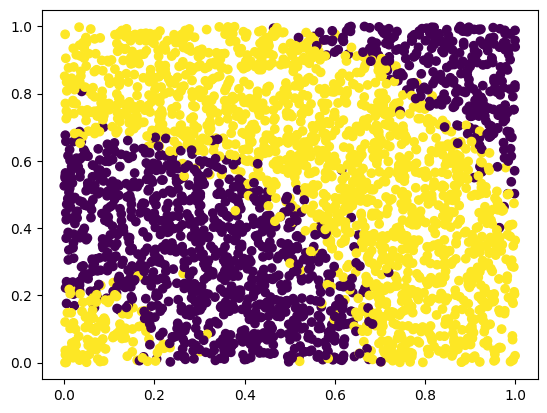

In [86]:
# This is our data
plt.scatter(X[:,0], X[:,1], c = y)

In [87]:
# We scale the coordinates to mean zero and standard deviation one, which makes it easier to train the neural networks.
X_scaled = X - X.mean(axis=0)
X_scaled = X_scaled/X_scaled.std(axis=0)

In [88]:
# This our logistic regression model with linear basis functions, using the compact `nn.Sequential` technique to define the network.
model = torch.nn.Sequential(torch.nn.Linear(2, 1), torch.nn.Sigmoid())

Here we are using the so called [Adam](https://arxiv.org/abs/1412.6980) optimizer. It's update step is slightly more sophisticated than the basic stochastic gradient descent optimizer used in the last exercise sheet. Instead of `torch.optim.SGD`, it can be accessed as `torch.otpim.Adam`.

In [89]:
# We now define loss function and optimizer
criterion = lambda p, y: -((1-y)*torch.log(1-p) + y*torch.log(p)).sum()   # same as torch.nn.BCELoss(), note that e.g. "f = lambda x: x^2" generates a function f(x) = x^2
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)  # An alternative optimizer

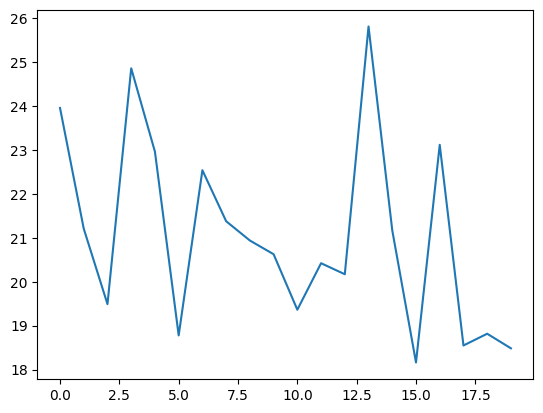

In [90]:
# This is a standard training loop
loss_hist = []
nbatch = 32  # number of training examples per minibatch
nepochs = 20 # numer of epoches, i.e. times we iterate through the entire dataset

for epoch in range(nepochs):
    # It is important to shuffle the dataset at each epoch so that the minibatches are not always the same
    shuffle = np.random.permutation(len(X))
    X_shuffled = X_scaled[shuffle]
    y_shuffled = y[shuffle]


    for i in range(len(X)//nbatch):
        X_scaled_batch = X_shuffled[i*nbatch:(i+1)*nbatch]
        y_batch = y_shuffled[i*nbatch:(i+1)*nbatch]

        optimizer.zero_grad()

        # forward pass
        y_pred = model(X_scaled_batch).squeeze(1)

        # compute loss
        loss = criterion(y_pred, y_batch)
        # backward pass
        loss.backward()
        optimizer.step()

    loss_hist.append(loss.item())
plt.plot(loss_hist)

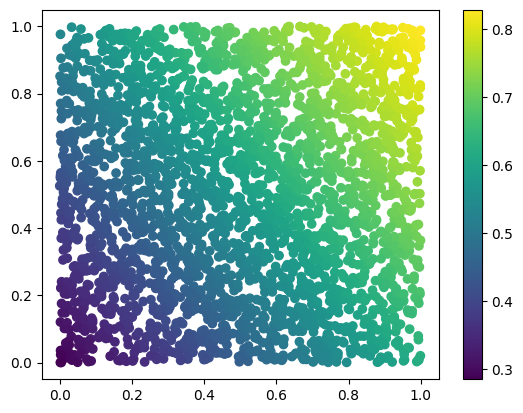

In [91]:
y_pred = model(X_scaled).squeeze(1).detach().numpy()
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.colorbar()

This is actually a pretty bad result, since it does not reflect our training data.  This is not a surprise, since the simple linear regression model with linear basis functions cannot generate a pattern like our training data. We will improve now in the next steps.

1.  (1 point) Explain briefly (one sentence each and in your own words) the role of the following components of the training loop: `nbatch`, `//`, `zero_grad()`, `.backward()`, `optimizer.step()`?

The role of the components in the training loop is as follows:
<br>
1. nbatch: The dataset is divided into batches to efficiently process the data. nbatch represents the total number of batches you have in your dataset.
2. // (Floor Division): The // operator is used for floor division in Python and is used to determine the total number of whole batches.
3. zero_grad(): The zero_grad() function is used to clear (zero out) the gradients of all parameters in the model before the backward pass. Gradients accumulate by default in PyTorch, so it's necessary to zero them out at the beginning of each training iteration to avoid mixing gradients between mini-batches.
4. .backward(): The .backward() method computes the gradients of the loss function with respect to all the parameters in the model. During the backward pass, gradients are computed for each parameter using the chain rule of calculus, propagating the gradients from the loss function backward through the computational graph.
5. optimizer.step(): After computing the gradients using .backward(), the optimizer.step() function is called to update the model parameters based on the computed gradients. The optimizer adjusts the parameters (e.g., using gradient descent) to minimize the loss function, effectively updating the model to improve its performance.

2. (1 point) We saw above that the output of our model does not look like what we want. To judge this more quantitatively, write an accuracy function, similar to exercise sheet 2, and quantify the performance of the model using the 3000 points used for training. Use `np.around` to round the predictions of the network, compare with the truth, and calculate the fraction of matches.

*Hint*: The accuracy here is measured by the frequency in which the model gives higher probability to the true label.

In [92]:
def accuracy(model, data, targets):
    """
    Compute the accuracy of the model on a dataset.

    Args:
    - model: PyTorch model
    - data: Tensor containing input data
    - targets: Tensor containing ground truth labels

    Returns:
    - accuracy: fraction of correct predictions
    """
    # Set the model to evaluation mode
    model.eval()

    # Forward pass to get predictions
    with torch.no_grad():
        outputs = model(data)

    # Round predictions to nearest integer (0 or 1)
    rounded_predictions = np.around(outputs.numpy())

    # Compare predictions with ground truth targets
    correct_predictions = np.sum(rounded_predictions == targets.numpy())

    # Calculate accuracy
    accuracy = correct_predictions / len(targets)

    return accuracy


3. (3 points) Improve the above model by introducing an additional hidden layer. Try out 2, 5, 25 and 50 as sizes for the single hidden layer. Use a ReLU activation function (`torch.nn.ReLU()`). How does it affect the result qualitatively? Evaluate this using the accuracy function from above.

Accuracies for different hidden layer sizes:
Hidden Layer Size: 2, Accuracy: 1272.64
Hidden Layer Size: 5, Accuracy: 1445.8666666666666
Hidden Layer Size: 25, Accuracy: 1392.9706666666666
Hidden Layer Size: 50, Accuracy: 1540.832


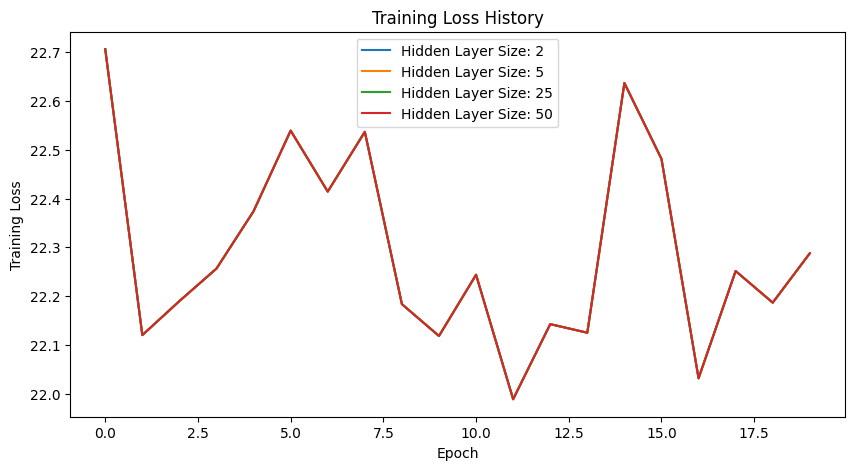

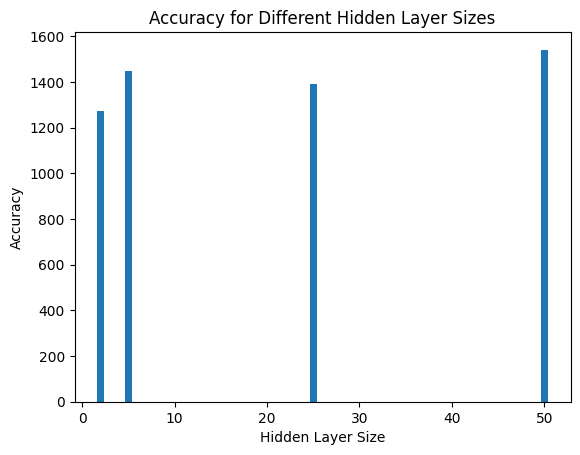

In [93]:
# Define the model with an additional hidden layer
class CustomModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomModel, self).__init__()
        self.hidden = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.output = torch.nn.Linear(hidden_size, output_size)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Initialize the model with different hidden layer sizes
hidden_layer_sizes = [2, 5, 25, 50]
models = [CustomModel(2, size, 1) for size in hidden_layer_sizes]

# Train and evaluate each model
accuracies = []
for model in models:
    model.train()
    loss_hist = []
    for epoch in range(nepochs):
        shuffle = np.random.permutation(len(X))
        X_shuffled = X_scaled[shuffle]
        y_shuffled = y[shuffle]

        for i in range(len(X) // nbatch):
            X_scaled_batch = X_shuffled[i * nbatch:(i + 1) * nbatch]
            y_batch = y_shuffled[i * nbatch:(i + 1) * nbatch]

            optimizer.zero_grad()
            y_pred = model(X_scaled_batch).squeeze(1)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        loss_hist.append(loss.item())

    # Evaluate the model
    accuracy_val = accuracy(model, X_scaled, y)
    accuracies.append(accuracy_val)

# Plot the training loss history
plt.figure(figsize=(10, 5))
for i, size in enumerate(hidden_layer_sizes):
    plt.plot(loss_hist, label=f'Hidden Layer Size: {size}')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.title('Training Loss History')

# Print and plot the accuracies
print("Accuracies for different hidden layer sizes:")
for size, acc in zip(hidden_layer_sizes, accuracies):
    print(f"Hidden Layer Size: {size}, Accuracy: {acc}")
plt.figure()
plt.bar(hidden_layer_sizes, accuracies)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Hidden Layer Sizes')
plt.show()


**Usage** of AI: *COMMENT HERE*

### 7.3 Regression! Testing the universal function approximation theorem (5 points)


In this exercise we will use a single layer perceptron to perform regression. We will, in this way, test the universal function approximation theorem by checking if such a simple neural network can approximate the cosine function well.

1. (1 point) Generate training data from a cosine function, `y = cos(x*4)`, with 1000 values of `x` uniformly drawn from [-1, 1]. Plot your function.

*Hint: Remember to convert your x and y data to torch tensors, if you create them using numpy.*

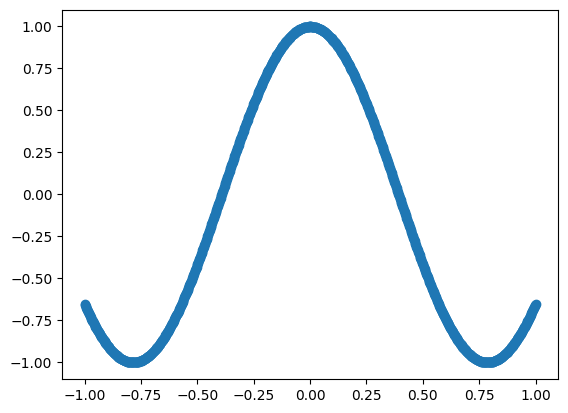

In [94]:
x_train = torch.linspace(-1, 1, 1000).unsqueeze(1)  # Unsqueezing to make it a column vector
y_train = torch.cos(4 * x_train)

plt.scatter(x_train,y_train)

2. (2 points) Define a network that implements a simple single-layer perceptron that maps general 1-dim inputs (x) onto general 1-dim outputs (y), with `nhidden` hidden parameters in the hidden layer. Use the ReLu activation function after the hidden layer. Instead of using `nn.Sequential` like above, complete the network class below. You have encountered this way of defining models before in section 6.3 on exercise sheet 4.

In [95]:
class SimplePerceptron(torch.nn.Module):
    def __init__(self, nhidden):
        super(SimplePerceptron, self).__init__()
        # Define the parameters for the hidden layer
        self.hidden = torch.nn.Linear(1, nhidden)  # Input size is 1, as it's a 1-dimensional input
        # Define the activation function
        self.relu = torch.nn.ReLU()
        # Define the parameters for the output layer
        self.output = torch.nn.Linear(nhidden, 1)  # Output size is 1, as it's a 1-dimensional output

    def forward(self, x):
        # Forward pass through the network
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x


3. (2 points) Train that model to recover the cosine curve. You should do so by minimizing the mean square error between the predicted function and the ground truth cosine function defined above. What is the minimum number of hidden parameters that you need for results that you would consider satisfactory?

*Hint: Pytorch has a built-in MSE loss you may use, check the documentation.  It helps to randomize the ordering of the data to improve training. Consider a minibatch size of 16 or 32, about 100-200 epochs, and a small enough learning rate.*

Epoch [1/200], Loss: 0.7557
Epoch [11/200], Loss: 0.0401
Epoch [21/200], Loss: 0.1826
Epoch [31/200], Loss: 0.1029
Epoch [41/200], Loss: 0.0361
Epoch [51/200], Loss: 0.0397
Epoch [61/200], Loss: 0.0314
Epoch [71/200], Loss: 0.0845
Epoch [81/200], Loss: 0.1019
Epoch [91/200], Loss: 0.0391
Epoch [101/200], Loss: 0.0468
Epoch [111/200], Loss: 0.0865
Epoch [121/200], Loss: 0.1254
Epoch [131/200], Loss: 0.0236
Epoch [141/200], Loss: 0.0971
Epoch [151/200], Loss: 0.0374
Epoch [161/200], Loss: 0.0878
Epoch [171/200], Loss: 0.0821
Epoch [181/200], Loss: 0.0309
Epoch [191/200], Loss: 0.0332


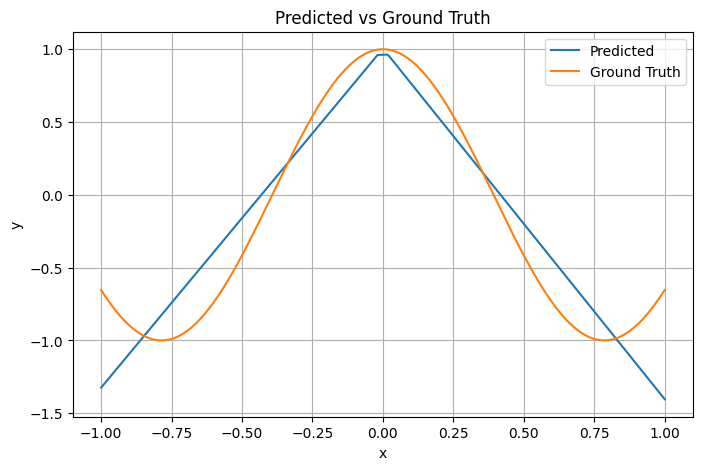

In [77]:
# Generate training data
x_train = torch.linspace(-1, 1, 1000).unsqueeze(1)  # Unsqueezing to make it a column vector
y_train = torch.cos(4 * x_train)

# Initialize the model with a certain number of hidden parameters
nhidden = 5  # You can adjust this value
model = SimplePerceptron(nhidden)

# Define the loss function (MSE loss)
criterion = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Set the number of epochs and minibatch size
nepochs = 200
nbatch = 32

# Training loop
for epoch in range(nepochs):
    # Randomize the ordering of the data
    permutation = torch.randperm(x_train.size(0))

    for i in range(0, x_train.size(0), nbatch):
        indices = permutation[i:i + nbatch]
        x_batch, y_batch = x_train[indices], y_train[indices]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        # Compute the loss
        loss = criterion(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch + 1}/{nepochs}], Loss: {loss.item():.4f}')

# Plot the ground truth and predicted functions
x_test = torch.linspace(-1, 1, 1000).unsqueeze(1)
with torch.no_grad():
    y_pred = model(x_test)

plt.figure(figsize=(8, 5))
plt.plot(x_test.numpy(), y_pred.numpy(), label='Predicted')
plt.plot(x_train.numpy(), y_train.numpy(), label='Ground Truth')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted vs Ground Truth')
plt.legend()
plt.grid(True)
plt.show()

**Usage** of AI: Fully AI generated

## Chapter 8: Convolutional Neural Networks (13 points)

In this exercise, we will be building a convolutional network in PyTorch to recognize handwritten digits as given in the MNIST dataset.

Required reading (*pior* to starting the exercises!):

https://nextjournal.com/gkoehler/pytorch-mnist (Excellent blog post on which these exercises are based)

https://en.wikipedia.org/wiki/MNIST_database (Description of the dataset we will be working with)

### 8.1 Convolutions (1 point)

1. (1 point)
  Before implementing convolutions using pytorch below, let us make sure we understand what they are doing, by hand.

  Consider the convolutional kernel

  $$
  K = \begin{pmatrix}
    1 & 2 \\
    3 & 4
  \end{pmatrix} \,,
  $$

  and the  input data

  $$
  I = \begin{pmatrix}
    -1 & 1 & 0 \\
    1 & -1 & -1 \\
    1 & 1 & 1
  \end{pmatrix} \,.
  $$

  By hand, compute the convolution $I \circledast K$ without padding (also known as 'valid', so your output should be a 2x2 matrix).

$I \circledast K = \begin{pmatrix} A & B \\ C & D \end{pmatrix}$
<br>
Where
<br>
$A = -1*1 + 1*3 + 1*2 + -1*4 = 0$
<br>
$B = 1*1 + -1*2 + 0*3 + 4*-1 = -5$
<br>
$C = 1*1 + -1*3 + 1*2 + 1*4 = 4$
<br>
$D = -1*1 + -1*3 + 1*2 + 1*4 = 2$
<br>
Therefore,
$I \circledast K = \begin{pmatrix} 0 & -5 \\ 4 & 2 \end{pmatrix}$

2. (2 point) Convolutional layers are the basic building block of deep convolutional neural networks that are used for image analysis tasks.
(a) Consider a 2-dim convolution layer with 2-channel input and 4-channel output. What is the number of parameters of that kernel if the kernel size is $5 \times 5$, including bias parameters?
(b) Describe in what sense convolutional layers are translation invariant. Are they rotation variant? (3-5 lines)

The number of parameters in the kernel is $2*4*5*5 + 4 = 204$
<br>
Convolutional layers exhibit translation invariance because they learn local patterns that are applicable across different spatial locations in the input image. This means that the network can recognize the same pattern regardless of where it appears in the image. However, convolutional layers are not inherently rotation invariant. When an image is rotated, the spatial relationships between pixels change, which can affect the performance of convolutional neural networks unless they are specifically trained or augmented to handle such transformations.








**Usage** of AI: None for 8.1.1, used ChatGPT 3.5 for 8.1.2

### 8.2 Using the GPU

One advantage of using pytorch as a framework is that it allows us to execute our code on the GPU. This can often greatly reduce the runtime needed to train neural networks. Below is a short description of how to do this.

If you want to try this out on Colab, you need to switch to GPU by selecting "Runtime > Change runtime type > GPU".

**Note:** Using a GPU is not required here, but it will make the code run faster. You can also complete the exercises using only the CPU.

In [96]:
# check if a GPU is available for pytorch
torch.cuda.is_available()

False

In [97]:
# we now select the device based on what is available
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

In [98]:
# let's look consider some dummy data
x = torch.tensor([0., 1., 2.])

In [99]:
# currently, the data is on the cpu
x.device

device(type='cpu')

In [100]:
# if we want to run code on the GPU, we have to move the input data to the corresponding device
x = x.to(DEVICE)

In [101]:
# we can check what device the tensor is on
x.device

device(type='cpu')

**Usage** of AI: *COMMENT HERE*

### 8.3 MNIST dataset (2 points)

Let's first initialize the random seeds.

In [102]:
# DO NOT CHANGE THIS
random_seed = 1
torch.manual_seed(random_seed)

Then we load training data.  We use here the traditional MNIST dataset, which are 28x28 images of hand-written digits between 0 and 9.

(Note: Don't worry if you see an HTTP Error 503 message, torchvision tries multiple URLs to download the data)

In [103]:
batch_size_train = 64  # by default we use a minibatch size of 64 for training.
# You can leave it like that during the subsequent exercises.

batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),

          ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
          transform=torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                  (0.1307,), (0.3081,)),
          ])),
    batch_size=batch_size_test, shuffle=True)

1. (1 point) Look up the `DataLoader` in PyTorch documentation. Explain the role of the `transform` statement in the above data loaders. What do the numbers 0.1307 and 0.3081 represent? Why do we normalize?  Why do we set `shuffle = True`?

The transform statement in the above data loaders specifies the transformations that should be applied to the data samples before they are returned by the loader. In this case, the transformations include converting the data to PyTorch tensors (ToTensor()) and then normalizing it (Normalize()).

The numbers 0.1307 and 0.3081 represent the mean and standard deviation values respectively. These values are used for normalizing the input data. In the context of the MNIST dataset, the mean and standard deviation values are calculated across all the pixel values of the entire dataset. Normalization is crucial because it standardizes the input data, ensuring that the model trains more efficiently and is less sensitive to variations in the input data distribution.

Setting shuffle = True in the data loader randomizes the order in which the data samples are presented to the model during training. This is important to prevent the model from learning spurious correlations based on the order of the data. Shuffling the data ensures that the model sees a diverse range of samples in each batch, leading to better generalization and improved training performance.

The loaders act as Python `generator` objects. Now let's take a look at some examples. We'll use `test_loader` for this.

The `list` function transforms it into a simple Python list, which contains tuples of batches of example images and "targets" (the correct digit). Let's see what one test data batch consists of.

In [104]:
examples = list(test_loader)
example_data, example_targets = examples[0]
print(example_data.shape)
print(example_targets.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


2. (1 point) Explain all components of the shapes of `example_data` and `example_targets`.

example_data.shape: This represents the shape of the data samples in the batch. In this case, example_data is a tensor representing the batch of input images. The shape of example_data indicates the dimensions of the tensor, typically in the format (batch_size, channels, height, width).
<br>
example_data.shape[0] gives the batch size, which is the number of images in the batch.
<br>
example_data.shape[1] gives the number of channels in each image. Since the MNIST dataset consists of grayscale images, this value would typically be 1.
example_data.shape[2] and example_data.shape[3] give the height and width of each image respectively, typically corresponding to the dimensions of the images in pixels.
<br>
example_targets.shape: This represents the shape of the target labels corresponding to the data samples in the batch. In this case, example_targets is a tensor representing the batch of target labels for the input images. The shape of example_targets indicates the dimensions of the tensor, typically in the format (batch_size).
<br>
example_targets.shape[0] gives the batch size, which is the same as the number of images in the batch. Each element in example_targets corresponds to the target label for the respective image in example_data.

Let's visualize some of our test data.

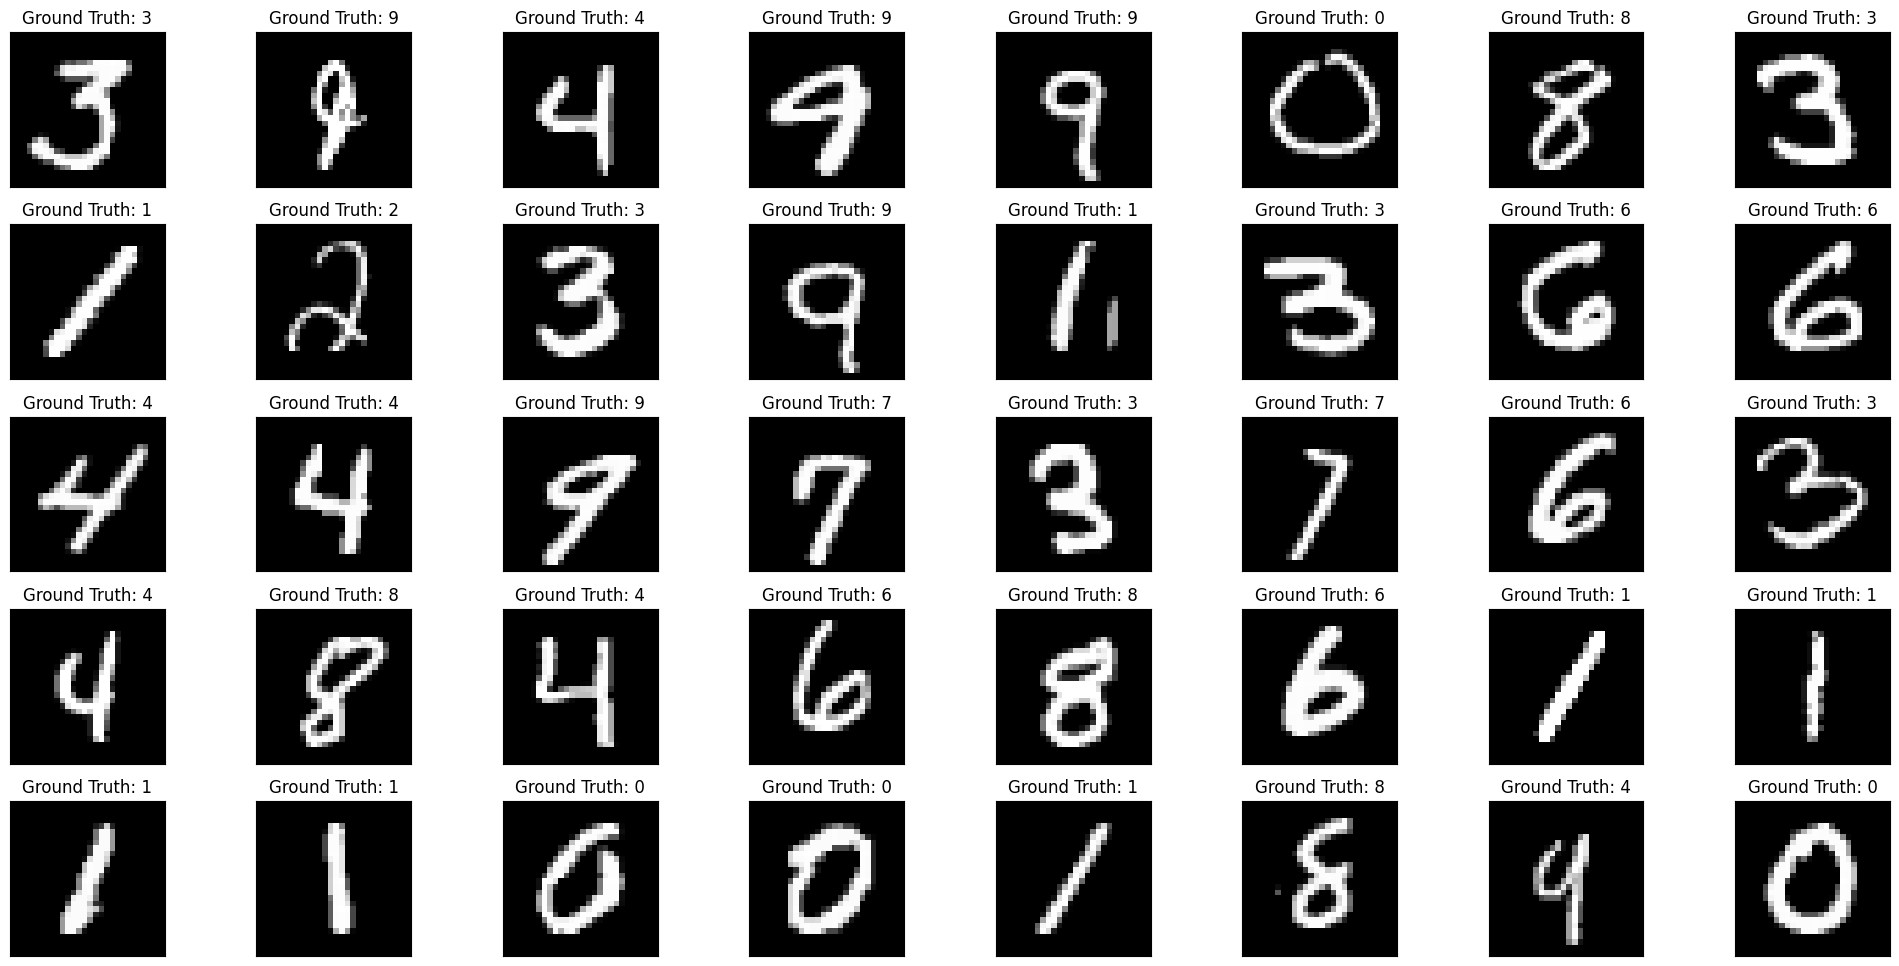

In [105]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

We will subsequently use the training data for training, and the test data for estimating the accuracy of our training. The next step is to define a convolutional neural network.

**Usage** of AI: Used ChatGPT 3.5 for 8.3

### 8.4 Building a CNN (5 points)

1. (4 points) Below you can see a diagram for a convolutional network, similar to the one you saw during the lecture. Translate this diagram into a PyTorch model by filling in the `Net` class below. After each max pooling step and after the first dense (linear) layer apply the relu activation function. You should use the modules `nn.Conv2d`, `nn.Linear` and the functions `F.max_pool2d` and `F.relu`.
Check the PyTorch documentation for these functions to see what parameters you must provide.

*Hint: Carefully think about the shapes of the intermediate layers and add padding to the convolutions where necessary, based on the information given below!*

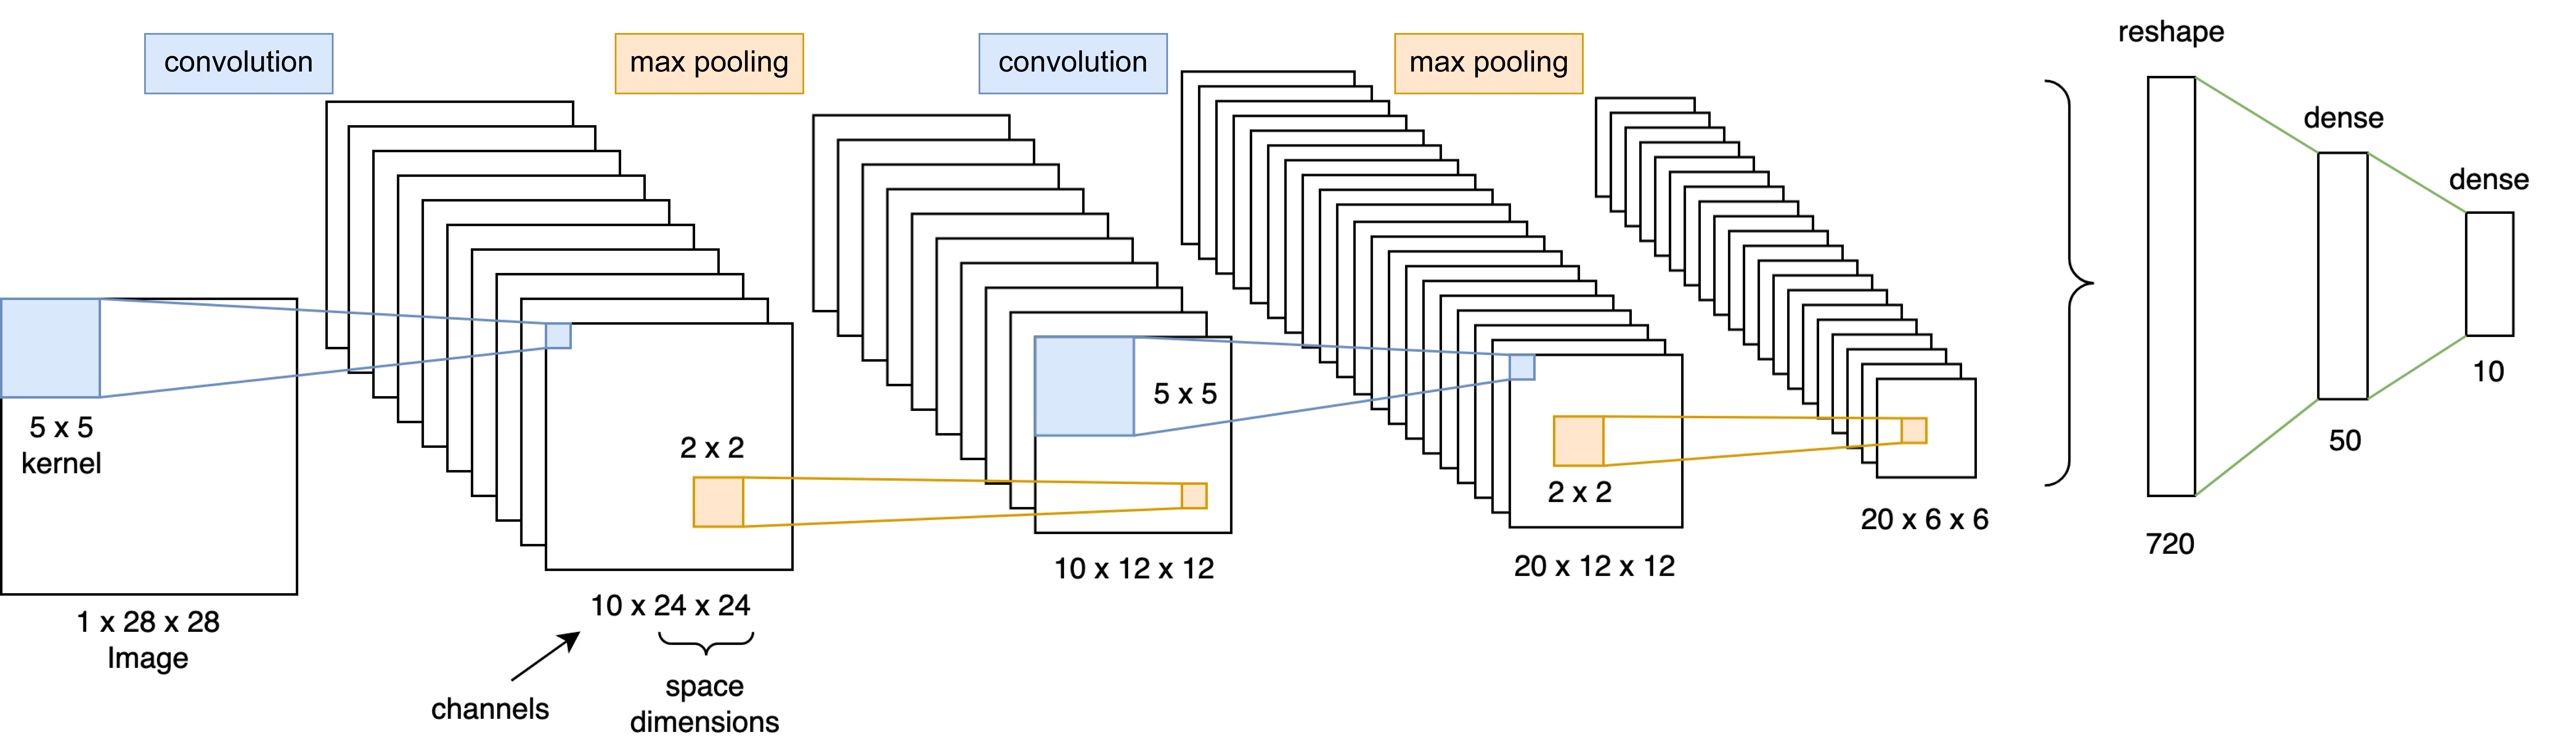

In [106]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [109]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Define max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Define fully connected (dense) layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes (assuming classification task)

    def forward(self, x):
        # Convolutional layers with ReLU activation and max pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        # Reshape the tensor for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Now we define the optimizer, and instantiate the network.

In [110]:
learning_rate = 0.001

network = Net().to(DEVICE)  # We move the network to the GPU
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

n_epochs = 2  # 2 epochs by default.  Leave it like that throughout the subsequent exercises.

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]


# This is the main training loop
log_interval = 10
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(DEVICE)
        target = target.to(DEVICE)
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))


# This is the main testing loop
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(DEVICE)
            target = target.to(DEVICE)
            output = network(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

2. (1 point) Write down mathematically how the fraction of correct classifications on the test data is calculated in the above test function.

The fraction of correct classifications is calculated as the ratio of correct samples to the total number of samples in the dataset. It is expressed as a percentage (by multiplying by 100).

**Usage** of AI: Used ChatGPT 3.5 for the code in 8.4.1, but not for 8.4.2

### 8.5 Evaluating the CNN's Performance (3 points)

Now let's do the training!

In [111]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 2.3112, Accuracy: 1054/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302808
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.284220
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.998353
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.460683
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.374418
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.217585
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.351496
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.536897
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.336749
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.381957
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.231752
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.231667
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.381975
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.211108
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.130895
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.141008
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.144064
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.150601
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.037811
Train Epoch: 1 [12160

Let's plot the training curve.

Text(0, 0.5, 'negative log likelihood loss')

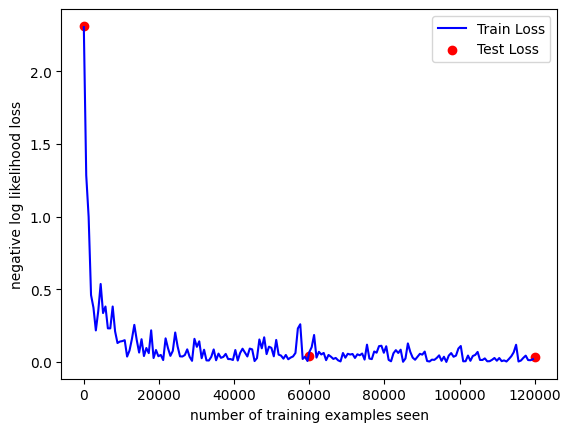

In [112]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Let's again look at a few examples as we did earlier in Section 9.1.2 and compare the model's output.

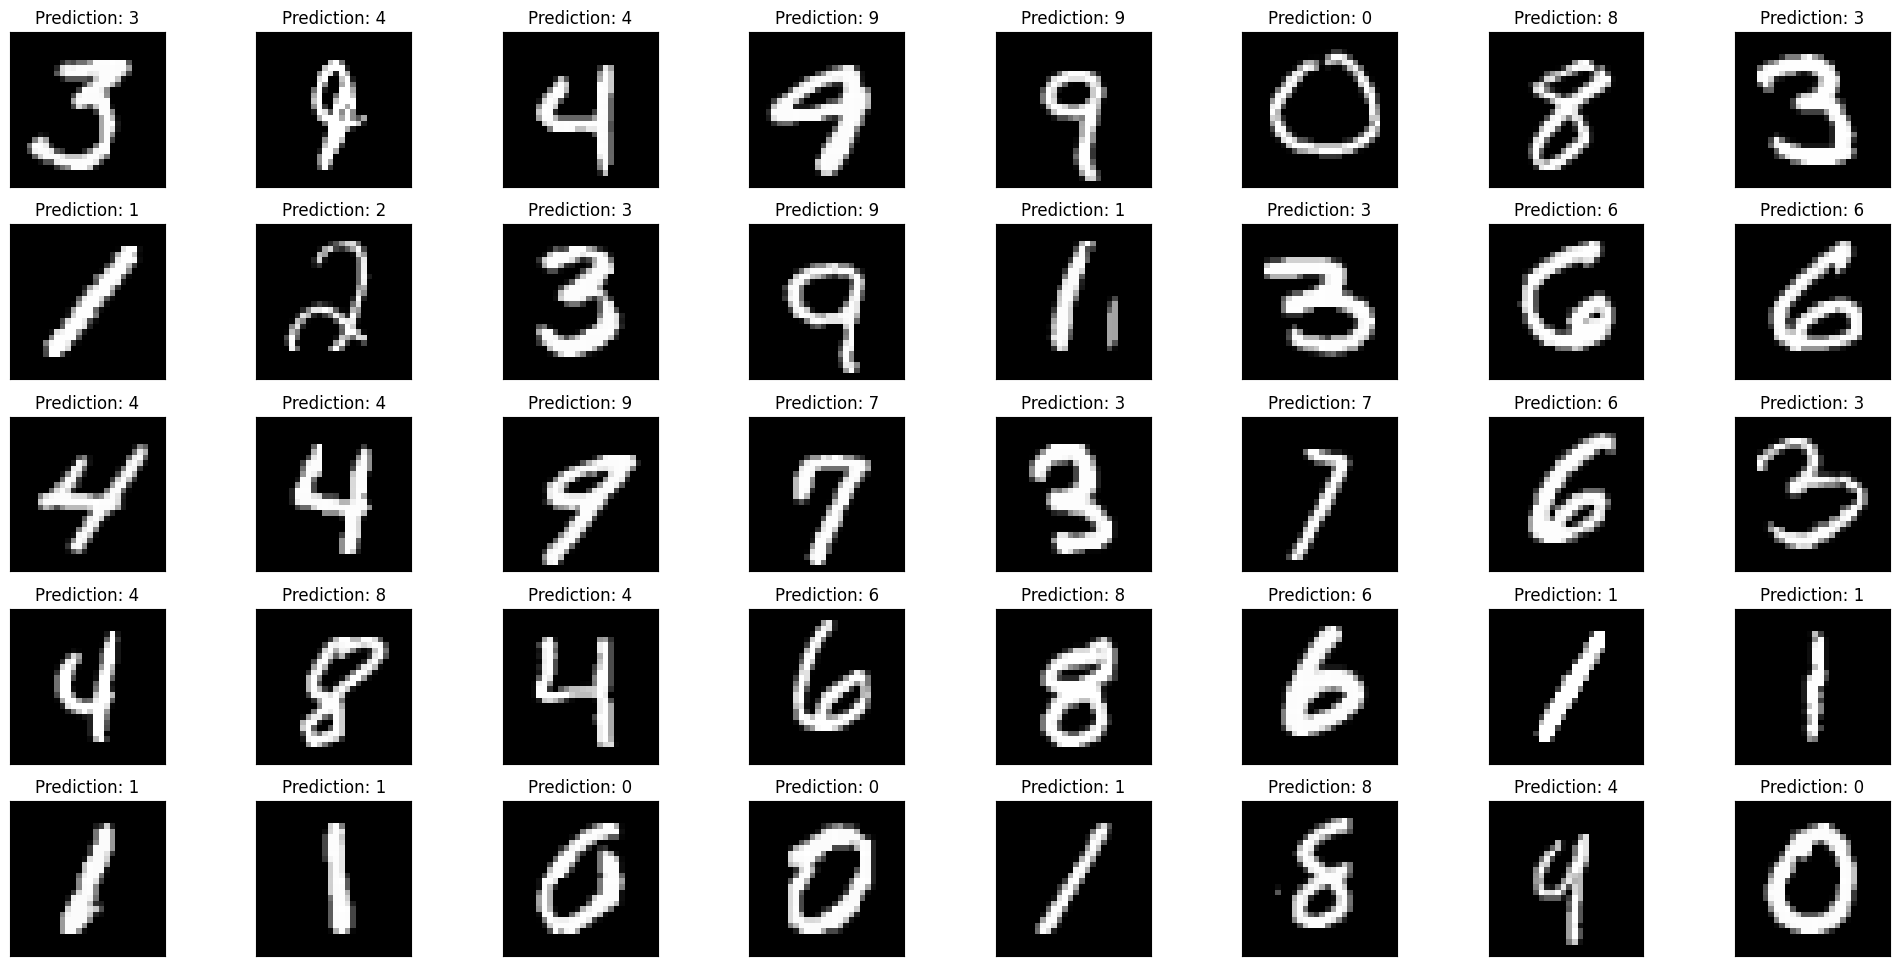

In [113]:
with torch.no_grad():
    output = network(example_data.to(DEVICE))

fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

1. (0.5 points) Run the above code and confirm that it has an accuracy of 98% or so. Explain why the initial accuracy is around 10%.

The model has an accuracy of only 10% initially due to random initialization, the model being untrained and the complexity of the MNIST dataset.

2. (2.5 points) Let's compare this to a one-layer perceptron (i.e. no hidden layers). Write a new `class Net` that flattens the 28 x 28 images, passes them through one fully connected linear layer with input size 28 times 28 and outputs a 10 dimensional one-hot vector. What is the classification accuracy in this case? Are you surprised? Discuss how the accuracy compares to the accuracy from the CNN from before.

In [114]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        # Define a single linear layer
        self.fc = nn.Linear(28 * 28, 10)  # Input size is 28x28, output size is 10 (number of classes)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Apply the linear layer
        x = self.fc(x)
        return x

perceptron = Perceptron().to(DEVICE)  # Move the model to GPU if available
optimizer = optim.Adam(perceptron.parameters(), lr=learning_rate)

perceptron_train_losses = []
perceptron_train_counter = []
perceptron_test_losses = []
perceptron_test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

# Training loop for the perceptron
def train_perceptron(epoch):
    perceptron.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(DEVICE)
        target = target.to(DEVICE)
        output = perceptron(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            perceptron_train_losses.append(loss.item())
            perceptron_train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

# Testing function for the perceptron
def test_perceptron():
    perceptron.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(DEVICE)
            target = target.to(DEVICE)
            output = perceptron(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    perceptron_test_losses.append(test_loss)
    print('\nPerceptron Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Train and test the perceptron
for epoch in range(1, n_epochs + 1):
    train_perceptron(epoch)
    test_perceptron()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.510957
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.624426
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.009420
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.728338
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.683719
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.504184
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.659769
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.476763
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.535999
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.492679
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.471582
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.304735
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.436832
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.432464
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.387877
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.276313
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.321266
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.447996
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.320118
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.416715
Train Epoch: 1 [12800/60000 (

It's not surprising that the perceptron's accuracy is lower than that of the CNN. CNNs are specifically designed for image classification tasks and are capable of learning hierarchical features from raw pixel values, while perceptrons lack this capability. Additionally, CNNs can capture spatial dependencies in the input data through their convolutional and pooling layers, which the perceptron cannot. Therefore, CNNs generally outperform simple linear models like perceptrons on image classification tasks.

**Usage** of AI: Used ChatGPT for the code and interpretation of the linear perceptron part